# Реализация нейронной сети для задачи классификации изображений рукописной цифр. 
Для реализации используется датасет MNIST

Зависимости:
- cpython>=3.8
- conda
- keras
- tenserflow

In [2]:
## Установка зависимостей
# ! pip install -U keras==2.11.0 tensorflow==2.11.0

In [110]:
# Подключение зависимостей
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
from matplotlib import pyplot as plt
from random import choice
import numpy as np

In [3]:
# Выставляем гиперпараметры сети
batch_size = 128  # размер партии в каждой итерации
num_epochs = 20  # количество эпох, то есть сколько раз мы пройдемся по всему датасету
hidden_size = 512  # количество скрытых нейронов

In [4]:
num_train = 60000  # количество экземляров в обучающей выборке
num_test = 10000  # количество экземляров в тестирующей выборке

height, width, depth = 28, 28, 1  # размер фотографий, 28 на 28, черно-белые
num_classes = 10  # количество классов, 10 цифр - 10 классов

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # полученние MNIST датасета

X_train = X_train.reshape(num_train, height * width)  # преобразование датасета в одномерный
X_test = X_test.reshape(num_test, height * width)  # преобразование датасета в одномерный
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255  # нормализация датасета до области [0, 1]
X_test /= 255  # нормализация датасета до области [0, 1]

Y_train = np_utils.to_categorical(y_train, num_classes)  # one-hot экодинд слоев
Y_test = np_utils.to_categorical(y_test, num_classes)  # one-hot экодинд слоев

In [5]:
inp = Input(shape=(height * width,))  # инициализация входных данных
hidden_1 = Dense(hidden_size, activation="relu")(inp)  # первый скрытый ReLu слой
hidden_2 = Dense(hidden_size, activation="relu")(hidden_1)  # второй скрытый ReLu слой
out = Dense(num_classes, activation="softmax")(hidden_2)  # выходной softmax слой

model = Model(inputs=inp, outputs=out)  # инициализация модели

2022-12-13 02:59:49.160721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(
    loss="categorical_crossentropy",  # используем cross-entropy функцию потерь
    optimizer="adam",  # используем оптимизатор Адама
    metrics=["accuracy"],
)  # собираем метрики по точности

In [7]:
model.fit(
    X_train,
    Y_train,  # обучаем модель обучающим датасетом
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=1,
    validation_split=0.1,
)  # придерживаем 10% данных под валидацию
model.evaluate(X_test, Y_test, verbose=1)  # проверяем модель на тестирующем датасете

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2257 - accuracy: 0.9334 - val_loss: 0.0946 - val_accuracy: 0.9713
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0852 - accuracy: 0.9739 - val_loss: 0.0785 - val_accuracy: 0.9770
Epoch 3/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0704 - val_accuracy: 0.9795
Epoch 4/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0719 - val_accuracy: 0.9785
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0768 - val_accuracy: 0.9803
Epoch 6/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0703 - val_accuracy: 0.9825
Epoch 7/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0772 - val_accuracy: 0.9803
Epoch 

[0.12432687729597092, 0.9768000245094299]

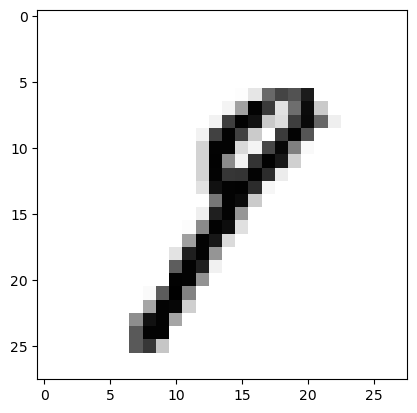

1/1 [==============================] - 0s 14ms/step
Результаты вычислений
0: 0.00000
1: 0.00193
2: 0.00000
3: 0.00000
4: 0.00031
5: 0.00000
6: 0.00000
7: 0.00000
8: 0.00001
9: 0.99776
Скорее всего это: 9, с уверенность: 0.997755229473114


In [120]:
nmist_dataset = mnist.load_data()
random_image = choice(nmist_dataset[1][0])  # получаем случайную цифру из датасета MNIST


plt.imshow(random_image, interpolation="nearest", cmap="Greys")
plt.show()
reshaped_image = random_image.reshape((height * width,))
reshaped_image = reshaped_image.astype("float32")
reshaped_image /= 255


X_test[0] is np.array(X_test[0])
X_test[0].shape, reshaped_image.shape, np.array(X_test[0]).shape
single_image = np.array([reshaped_image])
prediction = model.predict(single_image)[0]
print("Результаты вычислений")
prediction_dict = {num: value for num, value in enumerate(prediction)}
max_idx, max_value = 0, prediction_dict[0]
for num, value in enumerate(prediction):
    if max_value < value:
        max_idx, max_value = num, value
    print(f"{num}: {value:.5f}")

print(f"Скорее всего это: {max_idx}, с уверенность: {max_value}")